In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import statsmodels.formula.api as smf 
import re

# Load Data

In [13]:
# Full Survey
df = pd.read_csv("survey_full.csv")
df = df.drop(columns=['Unnamed: 0']) # drop unnecessary columns
print(df.shape)
df.head(1)

(3312, 226)


,user_id,partner_id,conversation,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,your_agreeable,your_conscientious,your_neurotic,your_open,who_i_talked_to_most_past24,most_common_format_past24,speaker,backchannel_given,backchannel_recieved,backchannel_count
0,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,4115,6.0,5.0,4.0,1.0,45.0,...,4.0,4.666667,3.0,4.666667,NaN,NaN,5a73899f9cdd1800017786f0,269,83,352


In [14]:
# Data Dictionary
datadict_df = pd.read_csv("datadict.csv")
print(datadict_df.shape)
datadict_df.head(1)

(229, 8)


,column,text,sub_questions,type,selector,sub_selector,choices,notes
0,user_id,The ID of the respondent.,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.backchannel_count.isnull().sum()

0

In [16]:
corr_df = pd.read_csv("corr.csv")
corr_df = corr_df.drop(columns=['Unnamed: 0'])
corr_df

,column,corr,column_description
0,your_mind_wander,-0.130299,"102 During your conversation, how much do y..."
1,interested_in_exchanging_contact_info,-0.129407,48 If you had the opportunity to exchange c...
2,my_sad_pre_covid,-0.122337,"195 Prior to the Covid-19 outbreak, to what..."
3,my_mind_wander,-0.120472,"101 During your conversation, how much did ..."
4,you_are_good_listener,0.101569,96 My partner was a good listener.\nName: t...
...,...,...,...
56,how_long_other,0.229871,119 How much longer do you think your partn...
57,am_i_sheltering_in_place_now,0.232449,202 Are you currently staying at home most ...
58,backchannel_given,0.644520,"Series([], Name: text, dtype: object)"
59,backchannel_recieved,0.644520,"Series([], Name: text, dtype: object)"


In [17]:
# Spearman's correlation
df.corr(method="spearman")["backchannel_recieved"].sort_values(ascending=False).head(20)

backchannel_recieved                 1.000000
backchannel_count                    0.610215
conv_length                          0.223045
survey_duration_in_seconds           0.143344
my_partner_was_clear_and_coherent    0.120695
end_other_time_1                     0.108877
how_long_other                       0.105935
end_you_time_1                       0.101781
how_enjoyable                        0.097188
i_felt_close_to_my_partner           0.091115
my_partner_paid_attention_to_me      0.087567
i_would_like_to_become_friends       0.086609
affect                               0.086255
how_long_you                         0.082487
am_i_sheltering_in_place_now         0.080630
next_seven_days                      0.077471
discussed_real_things_sr4            0.076017
best_affect                          0.075836
i_like_you                           0.071918
you_are_giving                       0.069934
Name: backchannel_recieved, dtype: float64

In [18]:
df.corr()["backchannel_recieved"].sort_values(ascending=True).head(20)

backchannel_given                       -0.165245
longer_other                            -0.102152
interested_in_exchanging_contact_info   -0.093564
your_mind_wander                        -0.090263
my_sad_pre_covid                        -0.083328
convo_format_other                      -0.080389
my_distracted_pre_covid                 -0.073241
my_mind_wander                          -0.069034
longer_self                             -0.068031
your_bfi_10                             -0.067403
convo_who_family                        -0.064955
n_living_with_me_post_covid             -0.060336
my_stress_pre_covid                     -0.058816
i_am_fair                               -0.051103
realtime                                -0.049517
i_am_quickwitted                        -0.041008
i_think_my_status                       -0.039377
i_am_humble                             -0.038313
convo_format_video_chat                 -0.038212
convo_format_phone_call                 -0.037777


In [27]:
upper_quant = df.conversationalist.quantile(0.75)

In [28]:
lower_quant = df.conversationalist.quantile(0.25)

In [30]:
df.conversationalist.count()

3257

In [29]:
df[df["conversationalist"]>upper_quant].count()

user_id                       626
partner_id                    626
conversation                  626
date                          626
survey_duration_in_seconds    626
                             ... 
most_common_format_past24      94
speaker                       626
backchannel_given             626
backchannel_recieved          626
backchannel_count             626
Length: 226, dtype: int64

In [33]:
df[df["conversationalist"]<lower_quant].count()

user_id                       775
partner_id                    775
conversation                  775
date                          775
survey_duration_in_seconds    775
                             ... 
most_common_format_past24      76
speaker                       775
backchannel_given             775
backchannel_recieved          775
backchannel_count             775
Length: 226, dtype: int64

In [37]:
df_conv = df[df["conversationalist"].notnull()].copy()
df_conv.sort_values("conversationalist")["conversationalist"]

2009      0.0
887       0.0
892       0.0
349       0.0
2399      0.0
        ...  
1748    100.0
617     100.0
1751    100.0
1680    100.0
1658    100.0
Name: conversationalist, Length: 3257, dtype: float64

In [56]:
import matplotlib.pyplot as plt
import shutil
import random
import numpy as np

random.seed(0)
np.random.seed(0)

low_conv = df_conv[df_conv["conversationalist"]<df_conv.conversationalist.quantile(0.25)]
low_conv_selected = low_conv.sample(20)
low_conv_ids = low_conv_selected["conversation"]
for conv_id in low_conv_ids:
    conv_dir = f"/Users/huayinluo/Downloads/candor(1)/{conv_id}/transcription/transcript_backbiter.csv"
    shutil.copy(conv_dir, f"/Users/huayinluo/Desktop/code/natconv/low_conv/{conv_id}_transcript_backbiter.csv")
    print(f"Finished {conv_id}")
    

Finished 7cda8619-2b2d-4344-901e-2e6de0a6101a
Finished c7724594-f71e-4881-b524-da59460aeb7c
Finished 8712e06c-82bc-46dc-ba0f-4181c1feaf48
Finished 0278950b-a7e0-4e15-8a2b-1629ff1b17ba
Finished f1f6de10-a5a9-42a2-a9e5-dd969e37171b
Finished 607a1155-0781-43a4-88ea-66a4cdb75585
Finished 293c053e-47a3-4ab5-84ab-c167527233ce
Finished f7fd5d51-95a8-4a62-a354-0d9f13e8bafe
Finished 826378b6-4c2b-4309-b66e-2a0a6b8fc162
Finished 4534b849-b002-42f2-84e7-d2cc9e73fa24
Finished 07b732f9-a9e0-43e9-85a4-263a6d78af0d
Finished 9ac1cd72-36b7-4fe1-a870-d35801fae201
Finished fd8146e2-378f-459a-bec6-e76896e135a0
Finished b877a5bf-3384-4ea0-bf82-cef399a1b00d
Finished bce0bc62-239e-4fdd-b2b8-252a4a6df717
Finished 69f68857-86f2-4357-9675-e4b2f62dad8d
Finished d92f6f54-ebb5-42ec-826e-a0916c2a8812
Finished fca231e3-c8d1-4e97-b015-94b6c5f505a1
Finished f81a3aa9-3cb3-4df0-ba18-9b1f6f19e5ba
Finished 397d469d-1ae2-4d4d-8cd4-20ccb3b260de


In [57]:
high_conv = df_conv[df_conv["conversationalist"]>df_conv.conversationalist.quantile(0.75)]
high_conv_selected = high_conv.sample(20)
high_conv_ids = high_conv_selected["conversation"]
for conv_id in high_conv_ids:
    conv_dir = f"/Users/huayinluo/Downloads/candor(1)/{conv_id}/transcription/transcript_backbiter.csv"
    shutil.copy(conv_dir, f"/Users/huayinluo/Desktop/code/natconv/high_conv/{conv_id}_transcript_backbiter.csv")
    print(f"Finished {conv_id}")

Finished 754240f9-69ef-481c-8484-3de526bf96a3
Finished 744c0219-e821-4c24-903e-92c25347da13
Finished b9e0eaaa-1013-4a5f-97b7-f1aaa7a04442
Finished 40597f35-77f2-4834-bc1c-7cba59be2597
Finished 53bcbe13-1160-4bd3-9eda-ea946079142d
Finished 8287d05f-f9d4-46d8-bb41-6a2e7b46987b
Finished 8d8f365d-385d-4116-a0c7-d7aad8e5dc30
Finished 1d932c05-9340-4f74-90a5-1820ae5c1646
Finished ea4c6102-1123-41fc-b8ab-96f4295af3d0
Finished a30fcd70-b96b-444a-baa1-2a340bb74cb0
Finished b8f9aeaf-a914-45bb-9d7c-7ef83b82f8d3
Finished 70fd143a-79e8-4b68-b779-4f3d97d9d56a
Finished 33d4bd03-1a0b-4252-9ebb-9ab864a57a7e
Finished 911bdf35-886c-451d-a26e-7b841cb17806
Finished 934e0711-7abb-4a17-a73e-4e6b2b175547
Finished 5a296223-a8fc-42bd-adc9-7e9382109c63
Finished 03567661-8004-4986-82d5-a32582ed9a6e
Finished dbab57c7-0154-4191-be76-5d7f60a0618e
Finished 69afe09f-da8f-4d79-9a1e-fb2bddf27924
Finished c7724594-f71e-4881-b524-da59460aeb7c


Text(0, 0.5, 'Conversation count')

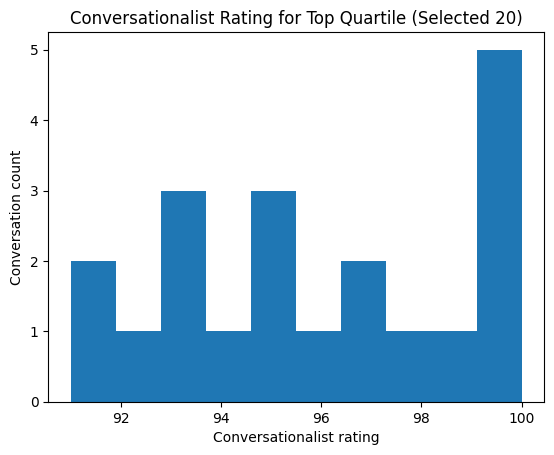

In [59]:
plt.hist(high_conv_selected.conversationalist)
plt.title("Conversationalist Rating for Top Quartile (Selected 20)")
plt.xlabel("Conversationalist rating")
plt.ylabel("Conversation count")


Text(0, 0.5, 'Conversation count')

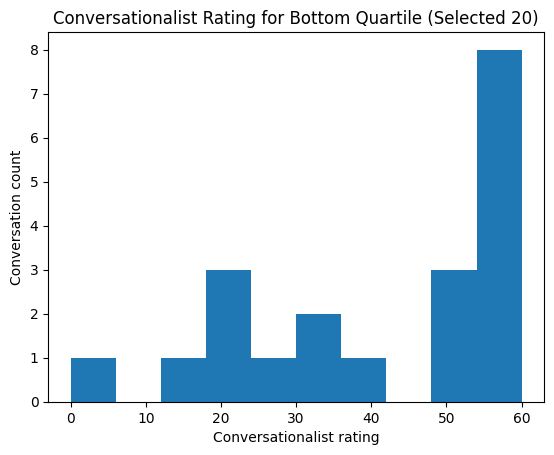

In [60]:
plt.hist(low_conv_selected.conversationalist)
plt.title("Conversationalist Rating for Bottom Quartile (Selected 20)")
plt.xlabel("Conversationalist rating")
plt.ylabel("Conversation count")

In [50]:
data_dir = "/Users/huayinluo/Downloads/candor(1)"

In [ ]:
import os
os.get

In [19]:
datadict_df[datadict_df["column"] == "affect"]["text"]

13    To what extent do you feel positive feelings (...
14    To what extent do you feel positive affect (e....
Name: text, dtype: object

In [20]:
df["your_mind_wander"].isnull().sum()

56

In [21]:
df["overall_affect"].isnull().sum()

55

In [22]:
plt.hist(df.overall_affect)

AttributeError: module 'matplotlib' has no attribute 'hist'

(array([   2.,    3.,    5.,   75.,  163., 1684., 1114.,  150.,   59.,
           2.]),
 array([-8. , -6.4, -4.8, -3.2, -1.6,  0. ,  1.6,  3.2,  4.8,  6.4,  8. ]),
 <BarContainer object of 10 artists>)

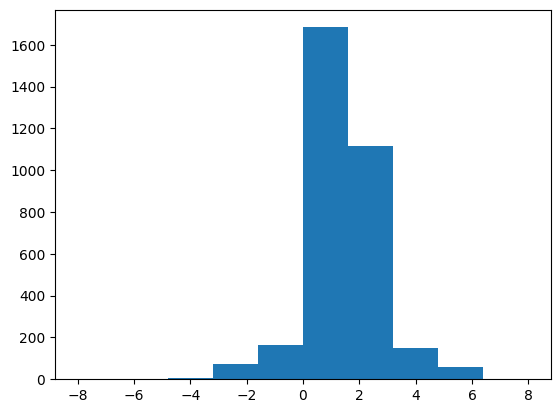

In [ ]:
plt.hist(df["affect_change"])

In [ ]:
df.cor

# Backchannels Analysis

## New Variables

In [ ]:
import matplotlib.pyplot as plt

### Mood Change

In [ ]:
df["end_affect"].isnull().sum()

55

In [ ]:
df["affect_change"] = df["end_affect"] - df["begin_affect"]
df["affect_change_is_positive"] = np.where(df["affect_change"] > 0, 1, 0)
df["affect_change_sign"] = np.where(df["affect_change"] > 0, 1, np.where(df["affect_change"] < 0, -1, 0))
df["arousal_change"] = df["end_arousal"] - df["begin_arousal"]
df["arousal_change_is_positive"] = np.where(df["arousal_change"] > 0, 1, 0)
df["arousal_change_sign"] = np.where(df["arousal_change"] > 0, 1, np.where(df["arousal_change"] < 0, -1, 0))

In [ ]:
df_selected = df[df["end_affect"].notnull()].copy()
df_selected.shape

(3257, 233)

(array([  1.,   1.,   2.,   1.,   0.,   5.,  22.,  53., 163.,   0., 856.,
        828., 712., 402.,   0., 150.,  48.,  11.,   1.,   1.]),
 array([-8. , -7.2, -6.4, -5.6, -4.8, -4. , -3.2, -2.4, -1.6, -0.8,  0. ,
         0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ]),
 <BarContainer object of 20 artists>)

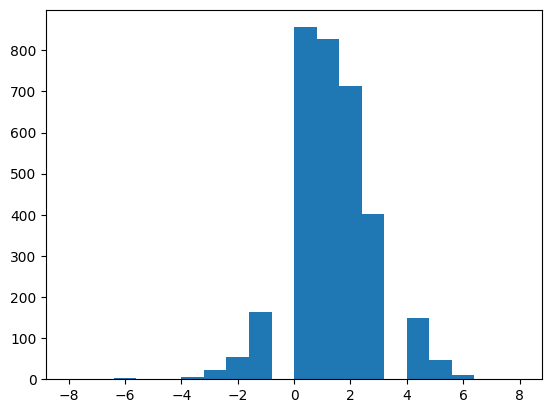

In [ ]:
plt.hist(df_selected["affect_change"], bins=20)

### 

## Correlations

Measures the *strength* and *direction* of correlation between two variables.

Pearman's coefficient: linear relationship
Spearman's coefficient: non-linear relationship

In [ ]:
from typing import Optional
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

np.random.seed(0)

In [ ]:
def get_var_description(var: str):
    """Return description for variable from data dictionary

    Args:
        var (str): variable of interest

    Returns:
        str: description for variable
    """
    return datadict_df[datadict_df['column']==var].iloc[0]['text']

In [ ]:
def get_lin_reg(df: pd.DataFrame, var_x: str, var_y: str, description: str = "", logistic: bool = False):
    """ Plots linear regression plot between two variables and returns fitted regression model

    Args:
        df (pd.DataFrame): dataframe
        var_x (str): feature variable
        var_y (str): outcome variable
        description: subtitle of plot
        logistic: whether to use logistic regression

    Returns:
        RegressionResultsWrapper: fitted regression model
    """
    reg = smf.ols(f'{var_y} ~ {var_x}', data = df).fit()
    plt.figure()
    sns.regplot(y=var_y, x=var_x, data=df)
    try:
        title = get_var_description(var_y)
    except:
        title = ""
    plt.title(f"Change in {var_y} with change in {var_x} \n '{title + description}'")
    plt.savefig(f"{var_y}_vs_{var_x}.png")
    plt.close()
    return reg

In [ ]:
vars = ['your_mind_wander',
'my_mind_wander',
'affect',
'best_affect',
'affect_change',
'affect_change_is_positive',
'how_enjoyable',
'my_partner_was_clear_and_coherent',
'conversationalist'
]

In [ ]:
reg = get_lin_reg(df, "backchannel_recieved", "best_affect", "")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            best_affect   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     23.78
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.13e-06
Time:                        19:48:33   Log-Likelihood:                -5156.9
No. Observations:                3257   AIC:                         1.032e+04
Df Residuals:                    3255   BIC:                         1.033e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.6539      0.042    183.329      0.000       7.572       7.736
backchannel_recieved     0.0012      0.000      4.876      0.000       0.001       0.002
==============================================================================
Omnibus:                      512.323   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              845.310
Skew:                          -1.048   Prob(JB):                    2.77e-184
Kurtosis:                       4.356   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = get_lin_reg(df, "backchannel_recieved", "affect", "")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 affect   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     34.52
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           4.65e-09
Time:                        19:48:33   Log-Likelihood:                -5505.3
No. Observations:                3257   AIC:                         1.101e+04
Df Residuals:                    3255   BIC:                         1.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                7.0624      0.046    152.001      0.000       6.971       7.154
backchannel_recieved     0.0017      0.000      5.875      0.000       0.001       0.002
==============================================================================
Omnibus:                      192.005   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.118
Skew:                          -0.623   Prob(JB):                     7.93e-50
Kurtosis:                       3.340   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Next

We can see that as backchannel increases, the distribution of the end_affect is more right skewed. The lowest end affect is smaller

In [ ]:
corr, _ = spearmanr(df.backchannel_count, df.how_long_other)
corr

nan

## Binarize Outcome (ex. Mood Change)

In [ ]:
df["backchannel_recieved"].corr(df["overall_affect"])

0.0700145996864357

In [ ]:
df["backchannel_recieved"].corr(df["affect_change"])

0.03551286294369532

In [ ]:
reg = get_lin_reg(df_selected, "backchannel_recieved", "affect_change", "Whether there is a positive affect change")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          affect_change   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.110
Date:                Thu, 15 Jun 2023   Prob (F-statistic):             0.0427
Time:                        19:48:36   Log-Likelihood:                -5950.0
No. Observations:                3257   AIC:                         1.190e+04
Df Residuals:                    3255   BIC:                         1.192e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1318      0.053     21.251      0.000       1.027       1.236
backchannel_recieved     0.0007      0.000      2.027      0.043    2.17e-05       0.001
==============================================================================
Omnibus:                      100.586   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.607
Skew:                           0.017   Prob(JB):                     3.48e-58
Kurtosis:                       4.396   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = get_lin_reg(df_selected, "backchannel_recieved", "affect_change_is_positive", "Whether there is a positive affect change")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     affect_change_is_positive   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.002
Method:                        Least Squares   F-statistic:                     8.873
Date:                       Thu, 15 Jun 2023   Prob (F-statistic):            0.00292
Time:                               19:48:36   Log-Likelihood:                -2181.1
No. Observations:                       3257   AIC:                             4366.
Df Residuals:                           3255   BIC:                             4378.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.6177      0.017     36.890      0.000       0.585       0.651
backchannel_recieved     0.0003      0.000      2.979      0.003       0.000       0.001
==============================================================================
Omnibus:                    19367.442   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              566.554
Skew:                          -0.678   Prob(JB):                    9.43e-124
Kurtosis:                       1.472   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
reg = get_lin_reg(df_selected, "backchannel_recieved", "affect_change_sign", "Whether there is a positive affect change")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     affect_change_sign   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.230
Date:                Thu, 15 Jun 2023   Prob (F-statistic):            0.00415
Time:                        19:48:37   Log-Likelihood:                -3105.0
No. Observations:                3257   AIC:                             6214.
Df Residuals:                    3255   BIC:                             6226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.5295      0.022     23.811      0.000       0.486       0.573
backchannel_recieved     0.0004      0.000      2.869      0.004       0.000       0.001
==============================================================================
Omnibus:                      545.128   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              856.577
Skew:                          -1.240   Prob(JB):                    9.93e-187
Kurtosis:                       3.406   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_has_change = df_selected[df_selected["affect_change"] != 0]

In [ ]:
reg = get_lin_reg(df_has_change, "backchannel_recieved", "affect_change_sign", "Whether there is a positive affect change")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     affect_change_sign   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.752
Date:                Thu, 15 Jun 2023   Prob (F-statistic):             0.0529
Time:                        19:48:37   Log-Likelihood:                -2213.0
No. Observations:                2401   AIC:                             4430.
Df Residuals:                    2399   BIC:                             4442.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.7499      0.026     29.212      0.000       0.700       0.800
backchannel_recieved     0.0003      0.000      1.937      0.053   -3.72e-06       0.001
==============================================================================
Omnibus:                     1209.991   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4993.300
Skew:                          -2.601   Prob(JB):                         0.00
Kurtosis:                       7.781   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_selected["backchannel_recieved_grouped"] = np.where(df_selected["backchannel_recieved"]>df_selected["backchannel_recieved"].median(), 1, 0)

Text(0, 0.5, 'Response Count')

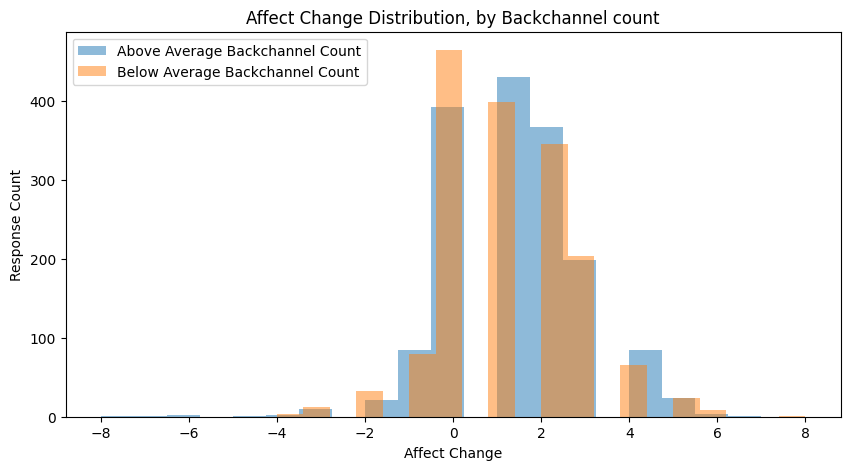

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==1]['affect_change'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==0]['affect_change'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend(loc='upper left')
plt.title("Affect Change Distribution, by Backchannel count")
plt.xlabel("Affect Change")
plt.ylabel("Response Count")

In [ ]:
data1 = df_selected[df_selected["backchannel_recieved_grouped"]==1]['affect_change']
data2 = df_selected[df_selected["backchannel_recieved_grouped"]==0]['affect_change']
print(np.var(data1), np.var(data2)) # similar variance

2.289544122811952 2.235610545315115


In [ ]:
import scipy.stats as stats
stats.ttest_ind(data1, data2, equal_var=True) 
# Cannot reject null hypothesis that means are equal

Ttest_indResult(statistic=1.3734335969604776, pvalue=0.16971217984031578)

In [ ]:
data1 = df_selected[df_selected["backchannel_recieved_grouped"]==1]['affect_change_is_positive']
data2 = df_selected[df_selected["backchannel_recieved_grouped"]==0]['affect_change_is_positive']
print(np.var(data1), np.var(data2)) # similar variance
print(np.mean(data1), np.mean(data2)) # mean proportion of affect change is positive
stats.ttest_ind(data1, data2, equal_var=True) 

0.21647172585336336 0.23063902215488782
0.6831072749691739 0.6391437308868502


Ttest_indResult(statistic=2.6522515880792255, pvalue=0.00803449522914264)

In [ ]:
data1 = df_selected[df_selected["backchannel_recieved_grouped"]==1]['conversationalist']
data2 = df_selected[df_selected["backchannel_recieved_grouped"]==0]['conversationalist']
print(np.var(data1), np.var(data2)) # similar variance
print(np.mean(data1), np.mean(data2)) # mean proportion of affect change is positive
stats.ttest_ind(data1, data2, equal_var=True) 

378.20662902659336 426.07260294213916
74.95129469790382 72.82813455657492


Ttest_indResult(statistic=3.0198459445143797, pvalue=0.0025486712906444193)

Text(0, 0.5, 'Response Count')

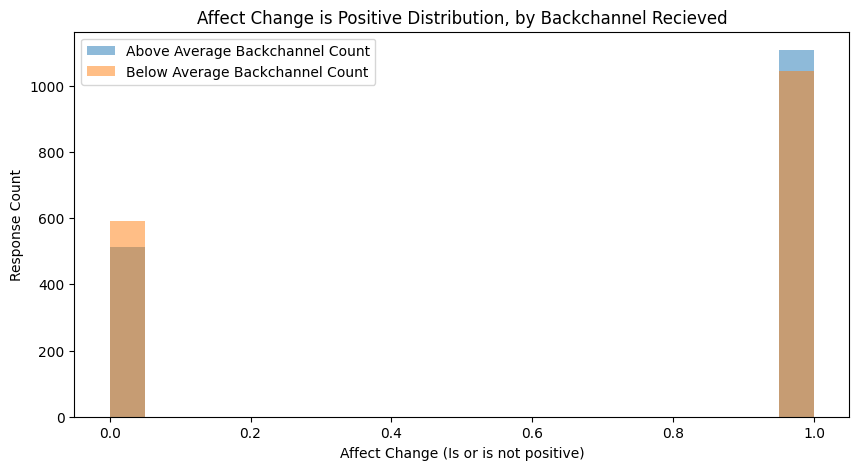

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==1]['affect_change_is_positive'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==0]['affect_change_is_positive'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend(loc='upper left')
plt.title("Affect Change is Positive Distribution, by Backchannel Recieved")
plt.xlabel("Affect Change (Is or is not positive)")
plt.ylabel("Response Count")

In [ ]:
df.groupby("backchannel_recieved_grouped")["affect_change_is_positive"].mean()

backchannel_recieved_grouped
0    0.628761
1    0.671515
Name: affect_change_is_positive, dtype: float64

In [ ]:
# Null = no difference in mean prob of positive affect change between two groups
# Alternative = difference in mean prob of positive affect change between two groups


Text(0, 0.5, 'Response Count')

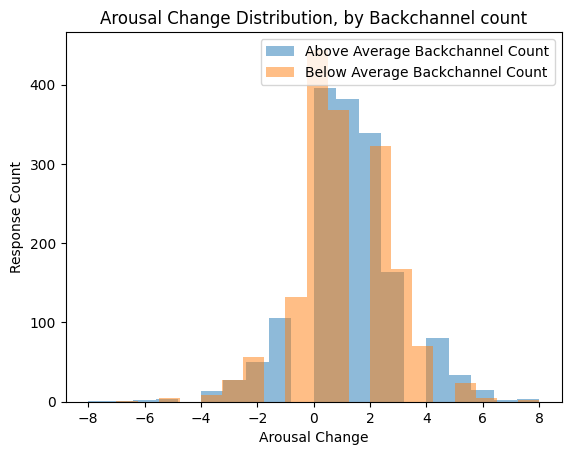

In [ ]:
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==1]['arousal_change'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==0]['arousal_change'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend()
plt.title("Arousal Change Distribution, by Backchannel count")
plt.xlabel("Arousal Change")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

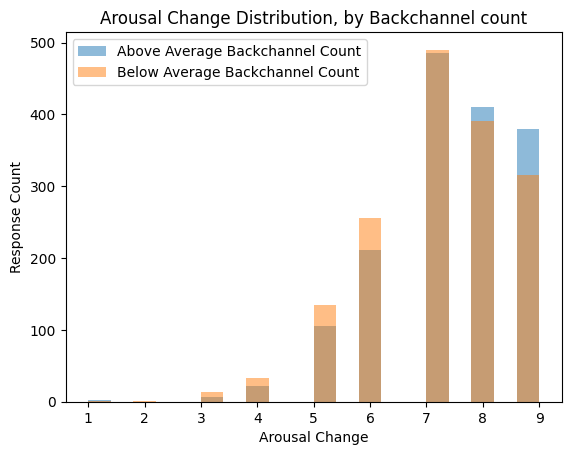

In [ ]:
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==1]['affect'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==0]['affect'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend()
plt.title("Arousal Change Distribution, by Backchannel count")
plt.xlabel("Arousal Change")
plt.ylabel("Response Count")

Text(0, 0.5, 'Response Count')

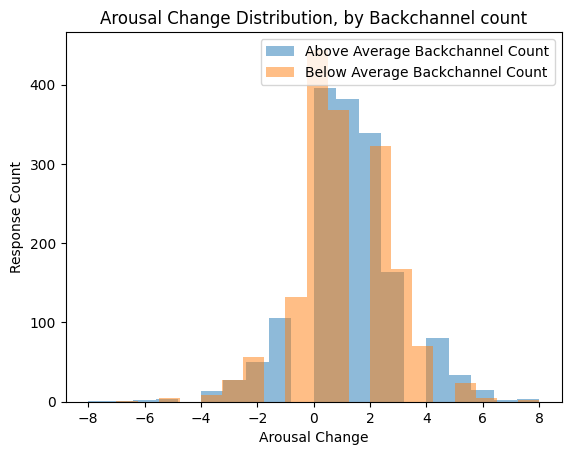

In [ ]:
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==1]['arousal_change'], alpha=0.5, label="Above Average Backchannel Count", bins=20)
plt.hist(df_selected[df_selected["backchannel_recieved_grouped"]==0]['arousal_change'], alpha=0.5, label="Below Average Backchannel Count", bins=20)
plt.legend()
plt.title("Arousal Change Distribution, by Backchannel count")
plt.xlabel("Arousal Change")
plt.ylabel("Response Count")

## Binarize Backchannel Count / Recieved / Given

In [ ]:
df_selected

,user_id,partner_id,conversation,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,backchannel_given,backchannel_recieved,backchannel_count,affect_change,affect_change_is_positive,affect_change_sign,arousal_change,arousal_change_is_positive,arousal_change_sign,backchannel_recieved_grouped
0,5a73899f9cdd1800017786f0,5fa072f4f4aa580b63834357,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,4115,6.0,5.0,4.0,1.0,45.0,...,269,83,352,3.0,1,1,3.0,1,1,0
1,5fa072f4f4aa580b63834357,5a73899f9cdd1800017786f0,0020a0c5-1658-4747-99c1-2839e736b481,2020-11-10,3949,6.0,7.0,6.0,1.0,43.0,...,269,83,352,2.0,1,1,2.0,1,1,0
2,5f482b0da1cde52de45f174c,5f57120cba207c18f058a62b,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,3293,8.0,7.0,6.0,1.0,34.0,...,76,96,172,2.0,1,1,2.0,1,1,0
3,5f57120cba207c18f058a62b,5f482b0da1cde52de45f174c,002d68da-7738-4177-89d9-d72ae803e0e4,2020-11-15,4393,5.0,7.0,5.0,1.0,34.0,...,76,96,172,2.0,1,1,2.0,1,1,0
4,5d510396f6725b001a4fc025,5dd5bc3bd5cef8000b9861d5,00411458-8275-4b92-a000-d52187f03604,2020-01-09,3215,6.0,6.0,4.0,2.0,35.0,...,188,61,249,4.0,1,1,4.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,5f39d80f9bbaf517512eb86d,5ef19d99454675561e3fc9bb,ffe29987-3502-4f72-9987-cc5208ae3880,2020-11-11,4785,6.0,4.0,3.0,1.0,30.0,...,50,249,299,1.0,1,1,0.0,0,0,1
3308,5dd406d9c23e0d3e6dacc034,5e820a4e26ed71918013d860,ffe5cccf-82b3-4938-a2e9-38335d188e44,2020-08-11,3614,5.0,7.0,7.0,1.0,39.0,...,186,259,445,2.0,1,1,2.0,1,1,1
3309,5e820a4e26ed71918013d860,5dd406d9c23e0d3e6dacc034,ffe5cccf-82b3-4938-a2e9-38335d188e44,2020-08-11,4182,5.0,8.0,8.0,1.0,30.0,...,186,259,445,2.0,1,1,2.0,1,1,1
3310,5977e3867412f8000194e1fe,5d5162f1b50a1000169da137,fffda3e6-7d99-4db8-aa12-16e99fa454c2,2020-08-11,2785,6.0,6.0,6.0,1.0,26.0,...,25,216,241,-1.0,0,-1,-2.0,0,-1,1


## Find Other Variables

(array([ 29.,  42.,  54.,  97., 132., 225., 376., 683., 781., 838.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

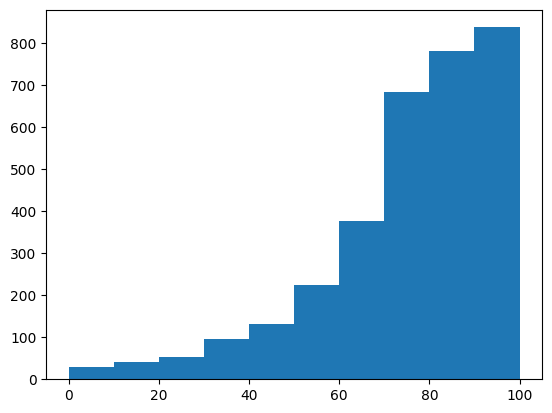

In [ ]:
plt.hist(df_selected["conversationalist"])

In [ ]:
get_lin_reg(df_selected, "backchannel_recieved", "conversationalist", "")

In [ ]:
df_selected["conversationalist_above_average"] = np.where(df_selected["conversationalist"]>50, 1, 0)
df_selected.groupby("conversationalist_above_average").count()["conversation"]


conversationalist_above_average
0     441
1    2816
Name: conversation, dtype: int64

(array([1579.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1678.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

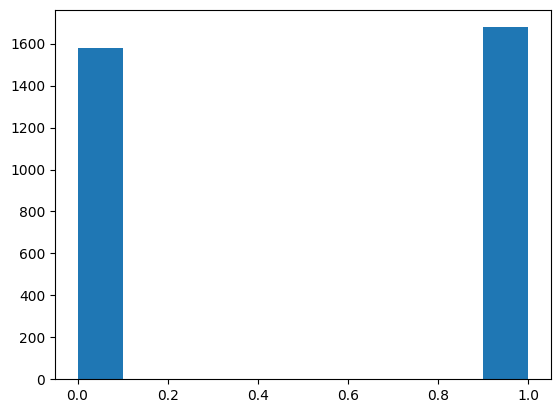

In [ ]:
plt.hist(np.where(df_selected["conversationalist"]>77, 1, 0)
)

In [ ]:
df_selected["conversationalist_above_quantile"] = np.where(df_selected["conversationalist"]>75, 1, 0)
df_selected.groupby("conversationalist_above_quantile").count()["conversation"]

conversationalist_above_quantile
0    1476
1    1781
Name: conversation, dtype: int64

In [ ]:
reg = get_lin_reg(df_selected, "backchannel_recieved", "conversationalist", "Whether the conversationalist is above the 75th percentile")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      conversationalist   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     21.39
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           3.89e-06
Time:                        19:51:46   Log-Likelihood:                -14382.
No. Observations:                3257   AIC:                         2.877e+04
Df Residuals:                    3255   BIC:                         2.878e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               71.0357      0.709    100.181      0.000      69.645      72.426
backchannel_recieved     0.0200      0.004      4.625      0.000       0.012       0.028
==============================================================================
Omnibus:                      578.300   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              965.582
Skew:                          -1.173   Prob(JB):                    2.12e-210
Kurtosis:                       4.270   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_selected["conversationalist"].quantile(0.25)

65.0

In [ ]:
df_selected["conversationalist"].quantile(0.75)

90.0

In [ ]:
df_selected["conversationalist_quantile"] = np.where(df_selected["conversationalist"]>=df_selected["conversationalist"].quantile(0.75), 1, np.where(df_selected["conversationalist"]<=df_selected["conversationalist"].quantile(0.25), -1, 0))

In [ ]:
df_selected_quant = df_selected[df_selected["conversationalist_quantile"] != 0].copy()
df_selected_quant.groupby("conversationalist_quantile").count()["conversation"]

conversationalist_quantile
-1    852
 1    838
Name: conversation, dtype: int64

In [ ]:
reg = get_lin_reg(df_selected_quant, "backchannel_recieved", "conversationalist_quantile", "Whether the conversationalist is above the 75th percentile")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     conversationalist_quantile   R-squared:                       0.012
Model:                                    OLS   Adj. R-squared:                  0.011
Method:                         Least Squares   F-statistic:                     20.33
Date:                        Thu, 15 Jun 2023   Prob (F-statistic):           6.97e-06
Time:                                19:55:38   Log-Likelihood:                -2387.8
No. Observations:                        1690   AIC:                             4780.
Df Residuals:                            1688   BIC:                             4791.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.1960      0.048     -4.070      0.000      -0.290      -0.102
backchannel_recieved     0.0013      0.000      4.509      0.000       0.001       0.002
==============================================================================
Omnibus:                     6277.629   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.241
Skew:                           0.023   Prob(JB):                     3.43e-59
Kurtosis:                       1.045   Cond. No.                         329.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([1476.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1781.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

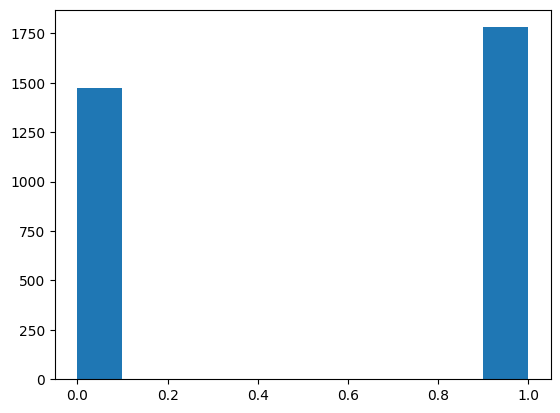

In [ ]:
plt.hist(df_selected["conversationalist_above_quantile"])

(array([1638.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1619.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

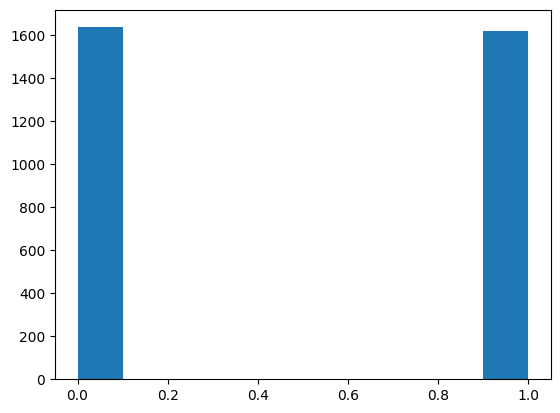

In [ ]:
df_selected["conversationalist_above_median"] = np.where(df_selected["conversationalist"]>df_selected["conversationalist"].median(), 1, 0)
plt.hist(df_selected["conversationalist_above_median"])

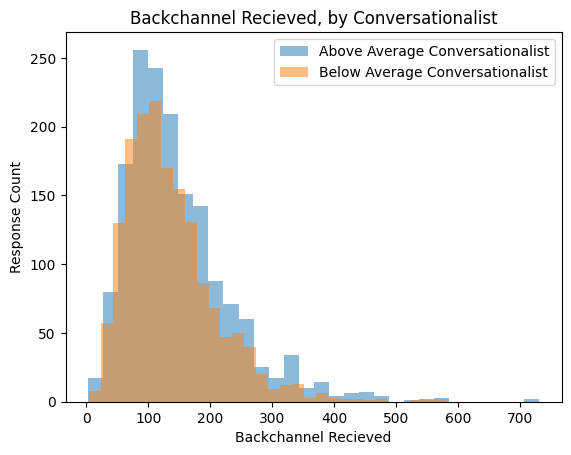

In [ ]:
plt.hist(df_selected[df_selected["conversationalist_above_median"]==1]["backchannel_recieved"], alpha=0.5, label="Above Average Conversationalist", bins=30)
plt.hist(df_selected[df_selected["conversationalist_above_median"]==0]["backchannel_recieved"], alpha=0.5, label="Below Average Conversationalist", bins=30)
plt.title("Backchannel Recieved, by Conversationalist")
plt.xlabel("Backchannel Recieved")
plt.ylabel("Response Count")
plt.legend()

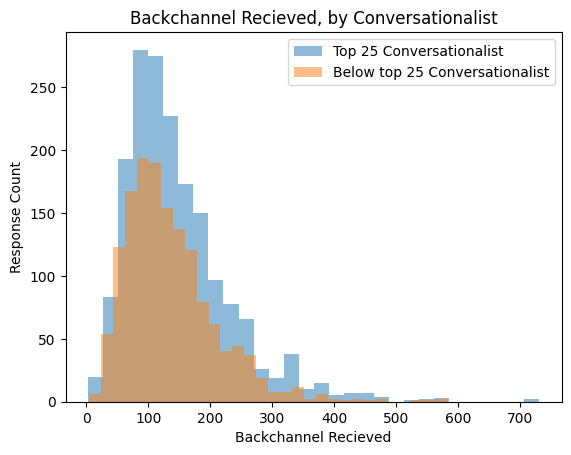

In [ ]:
plt.hist(df_selected[df_selected["conversationalist_above_quantile"]==1]["backchannel_recieved"], alpha=0.5, label="Top 25 Conversationalist", bins=30)
plt.hist(df_selected[df_selected["conversationalist_above_quantile"]==0]["backchannel_recieved"], alpha=0.5, label="Below top 25 Conversationalist", bins=30)
plt.title("Backchannel Recieved, by Conversationalist")
plt.xlabel("Backchannel Recieved")
plt.ylabel("Response Count")
plt.legend()

In [ ]:
df_selected.groupby("conversationalist_above_average").count()

,user_id,partner_id,conversation,date,survey_duration_in_seconds,time_zone,pre_affect,pre_arousal,technical_quality,conv_length,...,backchannel_count,affect_change,affect_change_is_positive,affect_change_sign,arousal_change,arousal_change_is_positive,arousal_change_sign,backchannel_recieved_grouped,conversationalist_above_quantile,conversationalist_above_median
conversationalist_above_average,,,,,,,,,,,,,,,,,,,,,
0,441,441,441,441,441,440,441,441,441,441,...,441,441,441,441,441,441,441,441,441,441
1,2816,2816,2816,2816,2816,2773,2816,2816,2816,2816,...,2816,2816,2816,2816,2816,2816,2816,2816,2816,2816


In [ ]:
df_selected.groupby("conversationalist_above_average")["backchannel_recieved"].mean()

conversationalist_above_average
0    132.385488
1    143.959162
Name: backchannel_recieved, dtype: float64

In [ ]:
reg = get_lin_reg(df_selected, "backchannel_recieved", "conversationalist_above_quantile", "")
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     conversationalist_above_quantile   R-squared:                       0.005
Model:                                          OLS   Adj. R-squared:                  0.005
Method:                               Least Squares   F-statistic:                     16.80
Date:                              Thu, 15 Jun 2023   Prob (F-statistic):           4.25e-05
Time:                                      19:48:42   Log-Likelihood:                -2341.2
No. Observations:                              3257   AIC:                             4686.
Df Residuals:                                  3255   BIC:                             4699.
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.4842      0.018     27.530      0.000       0.450       0.519
backchannel_recieved     0.0004      0.000      4.099      0.000       0.000       0.001
==============================================================================
Omnibus:                    11836.742   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              532.405
Skew:                          -0.185   Prob(JB):                    2.45e-116
Kurtosis:                       1.054   Cond. No.                         331.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(array([1662.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1650.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

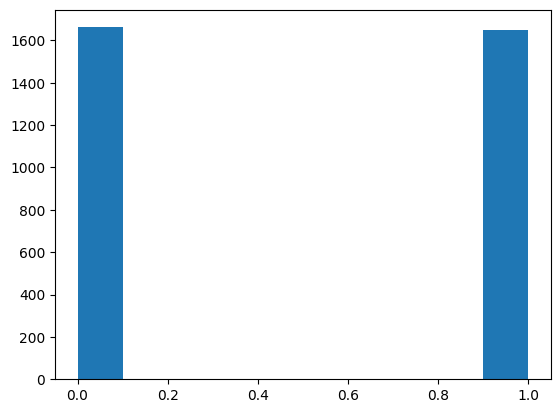

In [ ]:
df["backchannel_recieved_grouped"] = np.where(df["backchannel_recieved"]>df["backchannel_recieved"].median(), 1, 0)
plt.hist(df["backchannel_recieved_grouped"])

Text(0, 0.5, 'Response Count')

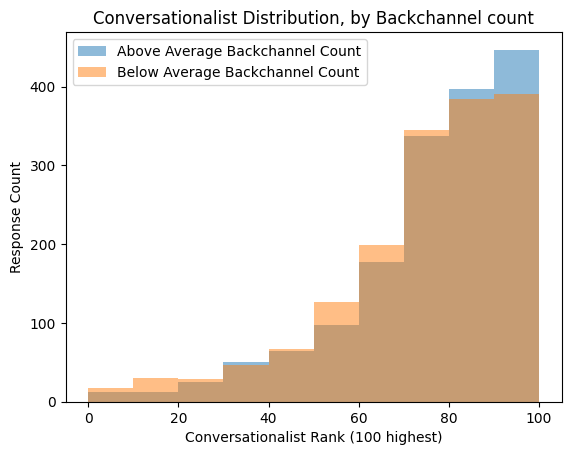

In [ ]:
plt.hist(df[df["backchannel_recieved_grouped"]==1]["conversationalist"], alpha=0.5, label="Above Average Backchannel Count", bins=10)
plt.hist(df[df["backchannel_recieved_grouped"]==0]["conversationalist"], alpha=0.5, label="Below Average Backchannel Count", bins=10)
plt.legend()
plt.title("Conversationalist Distribution, by Backchannel count")
plt.xlabel("Conversationalist Rank (100 highest)")
plt.ylabel("Response Count")

In [ ]:
reg = get_lin_reg(df, "backchannel_recieved_grouped", "conversationalist_above_quantile", "")
reg.summary()

PatsyError: Error evaluating factor: NameError: name 'conversationalist_above_quantile' is not defined
    conversationalist_above_quantile ~ backchannel_recieved_grouped
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^